In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
#loading the data
data = pd.read_csv("datasets/bank-full.csv")

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.shape

(45211, 17)

In [5]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [6]:
# Drop unnecessary features
data = data.drop(['duration', 'pdays', 'previous'], axis=1)

In [7]:
# Convert categorical features to numerical values
cat_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
level_substitution = {}

def levels2index(levels):
    dct = {}
    for i in range(len(levels)):
        dct[levels[i]] = i
    return dct

for c in cat_features:
    level_substitution[c] = levels2index(data[c].unique())
    data[c].replace(level_substitution[c], inplace=True)

In [8]:
# Convert target variable to numerical values
data['Target'].replace({'no': 0, 'yes': 1}, inplace=True)

In [9]:
# Split the data into features (X) and target variable (y)
X = data.drop('Target', axis=1)
y = data['Target']

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Create a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

In [12]:
# Train the classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [13]:
# Evaluate the classifier
y_pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.8282649563198053


In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      7952
           1       0.30      0.32      0.31      1091

    accuracy                           0.83      9043
   macro avg       0.60      0.61      0.61      9043
weighted avg       0.83      0.83      0.83      9043



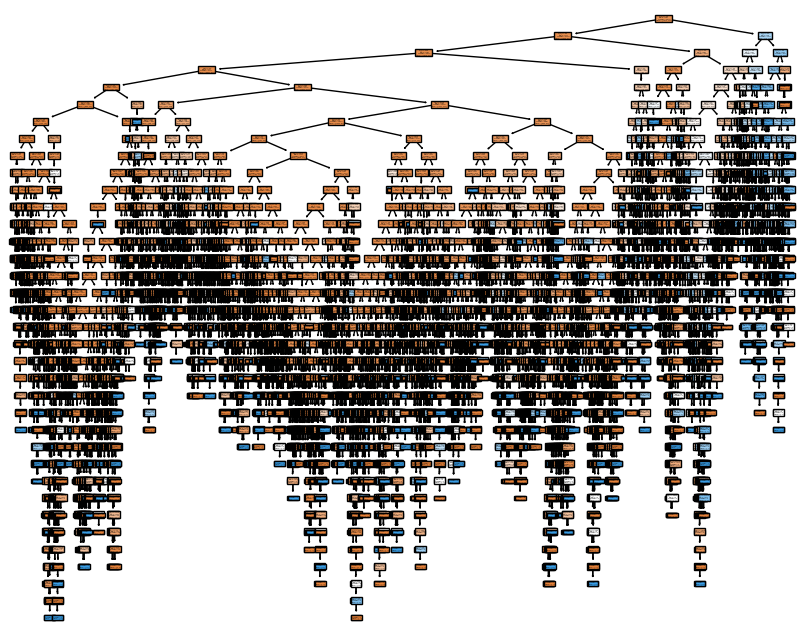

In [15]:
# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(clf, filled=True)
plt.show()